##**Ensemble Learning:**

###**Assignment Questions:**

###**Theoretical:**

**1.Can we use Bagging for regression problems?**

Ans:Yes, Bagging can be used for regression problems. In regression tasks, Bagging (Bootstrap Aggregating) helps reduce variance and improve predictive accuracy by training multiple models on different subsets of the data and averaging their predictions.  

A common example is **Bagging with Decision Trees**, where multiple regression trees are trained on bootstrapped samples, and their outputs are averaged to get the final prediction. **Random Forest Regressor** is an extension of this idea, where multiple decision trees are combined for robust regression.  

Bagging is particularly useful in regression when the base model has high variance, as it stabilizes predictions and reduces overfitting while maintaining flexibility.

**2.What is the difference between multiple model training and single model training?**

Ans:Difference Between Multiple Model Training and Single Model Training  

- **Single Model Training** – Involves training a single machine learning model on the entire dataset. The model learns patterns from the data and makes predictions independently. Examples include a single decision tree, logistic regression, or a neural network trained once.  

- **Multiple Model Training** – Uses multiple models to improve accuracy, stability, and generalization. Instead of relying on one model, multiple models are trained, and their predictions are combined. This is commonly seen in ensemble methods like Bagging, Boosting, and Stacking.  

**Key Differences**

- **Overfitting** – Single models, especially complex ones, may overfit the data, whereas multiple models (ensembles) help reduce overfitting by averaging predictions.  
- **Bias-Variance Tradeoff** – Single models may have high variance (like decision trees) or high bias (like linear regression), while multiple models balance bias and variance better.  
- **Performance** – Multiple models generally achieve higher accuracy by leveraging different learning perspectives, while a single model is limited by its own learning capacity.  
- **Complexity** – Single models are simpler to train and interpret, while multiple models require more computation and tuning but often provide better results.  

Multiple model training is especially useful when individual models are weak or unstable, making it a powerful approach for improving predictive performance.

**3.Explain the concept of feature randomness in Random Forest**

Ans:Feature randomness in Random Forest refers to the process of selecting a random subset of features at each split in a decision tree, rather than considering all features. This enhances the diversity among trees and reduces overfitting.  

**How It Works:**  
- In standard decision trees, at each split, the best feature is chosen from all available features.  
- In Random Forest, at each split, only a **random subset** of features is considered. The best feature is then selected from this subset.  
- This randomness ensures that different trees learn different patterns, making the ensemble more robust and generalizable.  

**Benefits:**  
- **Reduces Overfitting** – By forcing trees to use different feature combinations, the model avoids relying too much on any single feature.  
- **Increases Diversity** – Since different trees see different features, their predictions are less correlated, improving overall performance.  
- **Works Well for High-Dimensional Data** – Helps handle datasets with many features by preventing any dominant feature from always being chosen.  

Feature randomness, combined with bootstrapping, makes Random Forest a powerful and stable ensemble learning method, particularly for high-dimensional and noisy datasets.

**4.What is OOB (Out-of-Bag) Score?**

Ans:OOB (Out-of-Bag) Score is a built-in validation metric used in Random Forest to estimate model performance without needing a separate validation set.  

### How It Works  
- In Random Forest, each tree is trained on a **bootstrap sample** (random subset) of the dataset.  
- About **one-third** of the data is left out of each tree’s training set. This left-out data is called **Out-of-Bag (OOB) data**.  
- After training, each tree makes predictions on its respective OOB data.  
- The final OOB Score is computed by averaging the accuracy (or error) of these predictions across all trees.  

### Benefits  
- **Eliminates the Need for a Validation Set** – Since OOB data is unused during training, it acts as an automatic validation set.  
- **Provides an Unbiased Performance Estimate** – Unlike traditional train-test splits, OOB estimates are computed during training, reducing the risk of overfitting.  
- **Efficient for Small Datasets** – Maximizes data usage by avoiding a separate hold-out set.  

The OOB Score is similar to cross-validation but is built into Random Forest, making it an efficient and reliable performance measure.

**5.How can you measure the importance of features in a Random Forest model?**

Ans: Feature importance in a Random Forest model can be measured using two main methods: Gini Importance (Impurity-Based Importance) and Permutation Importance.

1. Gini Importance (Mean Decrease in Impurity)
Each decision tree in the forest splits nodes based on a feature that reduces impurity (e.g., Gini impurity or entropy in classification, variance in regression).
The decrease in impurity is calculated for each feature every time it is used in a split.
The average reduction in impurity across all trees gives the feature importance score.
This method is fast but can be biased toward features with more categories or higher values.

**Implementation in Scikit-Learn:**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the dataset (Iris dataset as an example)
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
for i, v in enumerate(importances):
    print(f"Feature {i}: {v:.4f}")

Feature 0: 0.1081
Feature 1: 0.0304
Feature 2: 0.4400
Feature 3: 0.4215


2. Permutation Importance
Instead of relying on impurity reduction, this method shuffles the values of each feature and measures how much it impacts model accuracy.
A larger drop in accuracy indicates that the feature is important.
This method is more reliable but computationally expensive.

Permutation Feature Importances:
petal length (cm): 0.2500
petal width (cm): 0.2200
sepal width (cm): 0.0000
sepal length (cm): 0.0000


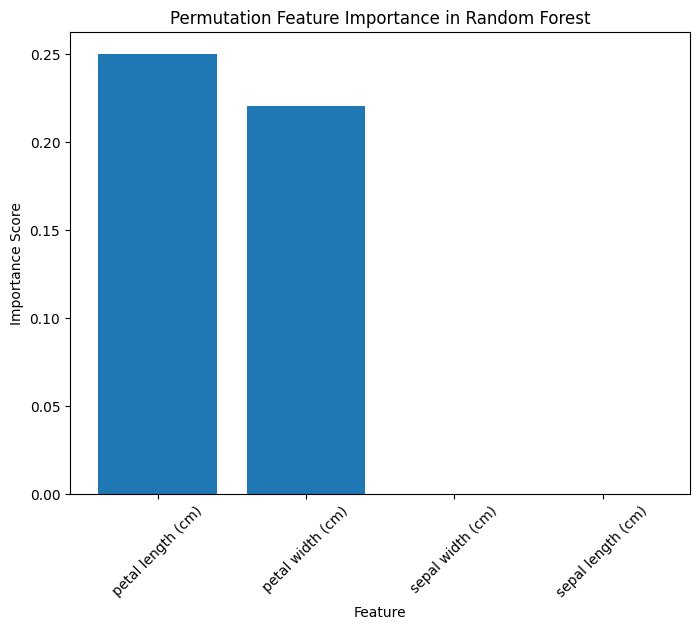

In [4]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Get feature names
feature_names = iris.feature_names

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Print feature importance scores
print("Permutation Feature Importances:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {perm_importance.importances_mean[i]:.4f}")

# Plot permutation importance
plt.figure(figsize=(8, 6))
plt.bar(range(len(perm_importance.importances_mean)), perm_importance.importances_mean[sorted_idx], align="center")
plt.xticks(range(len(perm_importance.importances_mean)), np.array(feature_names)[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Permutation Feature Importance in Random Forest")
plt.show()

**6.Explain the working principle of a Bagging Classifier.**

Ans:A **Bagging Classifier** (Bootstrap Aggregating) is an ensemble learning method that improves model stability and accuracy by combining multiple base models (typically decision trees). It reduces variance and prevents overfitting.  

**Working Principle**  
1. **Bootstrap Sampling**  
   - Random subsets of the training data are created with replacement. Each subset may contain duplicate samples.  
   - This ensures diversity in training instances for each base model.  

2. **Training Multiple Models**  
   - Each subset is used to train an independent base model (e.g., decision trees).  
   - The models are trained in parallel without interaction.  

3. **Aggregation of Predictions**  
   - For **classification**, the final prediction is made using **majority voting** (the class predicted by most models is chosen).  
   - For **regression**, predictions are averaged to get the final output.  

**Advantages**  
- **Reduces Overfitting** by averaging multiple models.  
- **Handles Noisy Data** by training on different subsets.  
- **Works Well with High Variance Models** like decision trees.  
- **Parallel Processing** speeds up computation.  

**Disadvantages**  
- **Computationally Expensive** due to training multiple models.  
- **Less Effective on Low Variance Models** like linear regression.  

Bagging is widely used in algorithms like **Random Forest**, where multiple decision trees are combined for robust predictions.

**7.How do you evaluate a Bagging Classifier’s performance?**

Ans: To evaluate a **Bagging Classifier’s** performance, we can use the following methods:  

1. **Accuracy Score** – Measures overall correctness using `accuracy_score()`.  
2. **Cross-Validation** – Uses multiple data splits for reliable performance with `cross_val_score()`.  
3. **Out-of-Bag (OOB) Score** – Estimates accuracy using samples not included in training (`oob_score=True`).  
4. **Precision, Recall, and F1-Score** – Useful for imbalanced datasets (`classification_report()`).  
5. **ROC-AUC Score** – Measures classification ability, especially for binary tasks (`roc_curve()`, `auc()`).  

These techniques ensure a robust evaluation of the model’s accuracy and generalization ability.

**8.How does a Bagging Regressor work?**

Ans:A **Bagging Regressor** is an ensemble learning method that improves regression performance by combining multiple models trained on different subsets of the data. It reduces variance and enhances stability.  

### **How It Works**  
1. **Bootstrap Sampling**  
   - Random subsets of the training data are created with replacement.  
   - Each subset is used to train a separate base regressor (e.g., Decision Tree Regressor).  

2. **Training Multiple Models**  
   - Each regressor is trained independently on its respective subset.  
   - This creates diverse models, reducing overfitting.  

3. **Aggregating Predictions**  
   - Instead of majority voting (used in classification), predictions from all models are **averaged** to get the final output.  
   - This helps in reducing variance and improving generalization.  

### **Advantages**  
- **Reduces Overfitting** by averaging multiple predictions.  
- **Handles Noisy Data** effectively.  
- **Works Well with High Variance Models** like decision trees.  

### **Example Code**  
```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.2, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Regressor
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
```

### **Key Differences from Bagging Classifier**  
- **Uses Averaging Instead of Voting** to combine predictions.  
- **Minimizes Variance** rather than optimizing classification accuracy.  
- **Evaluated Using Regression Metrics** like **MSE, RMSE, and R²** instead of accuracy.  

This method is widely used for improving the performance of unstable regressors like **Decision Trees**.

**9.What is the main advantage of ensemble techniques?**

Ans:The main advantage of **ensemble techniques** is that they improve model performance by combining multiple models, leading to better accuracy, stability, and generalization.  

### **Key Benefits:**  
1. **Higher Accuracy** – Combines multiple weak models to create a stronger and more accurate model.  
2. **Reduced Overfitting** – Methods like **Bagging** reduce variance, preventing overfitting.  
3. **Better Generalization** – Works well on unseen data by capturing diverse patterns.  
4. **Handles Noisy Data** – More robust against outliers and inconsistencies in data.  
5. **Works Well with Weak Learners** – Boosting methods improve weak models by iteratively adjusting weights.  

Ensemble techniques like **Bagging, Boosting, and Stacking** are widely used in real-world applications to enhance predictive performance.

**10.What is the main challenge of ensemble methods?**

Ans:The main challenge of **ensemble methods** is their **complexity** and **computational cost** due to combining multiple models.  

### **Key Challenges:**  
1. **Higher Computational Cost** – Training multiple models increases time and resource usage.  
2. **Difficult to Interpret** – Unlike simple models, ensembles (e.g., Random Forest, Boosting) are less explainable.  
3. **Risk of Overfitting** – If not tuned properly, complex ensembles may overfit the training data.  
4. **Need for More Data** – Some methods, like Boosting, require large datasets for better performance.  
5. **Hyperparameter Tuning** – Choosing the right number of estimators and model parameters can be challenging.  

Despite these challenges, ensemble methods remain powerful for improving accuracy and generalization.

**11.Explain the key idea behind ensemble techniques.**

Ans: The key idea behind **ensemble techniques** is to combine multiple models to create a stronger and more accurate predictive model than any individual model alone.  

### **Core Principles:**  
1. **Diversity** – Different models learn different patterns, reducing errors.  
2. **Aggregation** – Predictions from multiple models are combined (e.g., majority voting for classification, averaging for regression).  
3. **Reduction in Variance & Bias** – Bagging reduces variance, Boosting reduces bias, and Stacking improves performance by learning from multiple models.  
4. **Improved Generalization** – The combined model performs better on unseen data, reducing overfitting.  

Common ensemble methods include **Bagging, Boosting, and Stacking**, each enhancing model stability and accuracy.

**12.What is a Random Forest Classifier?**

Ans: A Random Forest Classifier is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

**How It Works:**
Bootstrap Sampling – Random subsets of the training data are created with replacement.
Multiple Decision Trees – Each tree is trained independently on a different subset.
Feature Randomness – At each split, only a random subset of features is considered to reduce correlation between trees.
Majority Voting – For classification, the final prediction is based on the most common class predicted by the trees.

**Advantages:**
Reduces Overfitting compared to a single decision tree.
Handles Missing Values and noisy data well.
Works Well with Large Datasets and high-dimensional data.

**Use Cases:**
Image and text classification
Fraud detection
Medical diagnosis
Customer churn prediction
Random Forest is a powerful, versatile classifier that balances accuracy and robustness.

**13.What are the main types of ensemble techniques?**

Ans: The main types of **ensemble techniques** are:  

### **1. Bagging (Bootstrap Aggregating)**  
- Trains multiple models on different random subsets of data (with replacement).  
- Reduces variance and prevents overfitting.  
- Example: **Random Forest** (an ensemble of decision trees).  

### **2. Boosting**  
- Sequentially trains weak models, adjusting weights to focus on misclassified samples.  
- Reduces bias and improves accuracy.  
- Examples: **AdaBoost, Gradient Boosting, XGBoost, LightGBM**.  

### **3. Stacking (Stacked Generalization)**  
- Combines multiple different models and uses a meta-model to make the final prediction.  
- Learns from the strengths of different algorithms.  
- Example: Combining **Logistic Regression, Decision Trees, and SVM** with a meta-classifier.  

### **4. Voting (for Classification) & Averaging (for Regression)**  
- Combines multiple models by majority voting (classification) or averaging predictions (regression).  
- Can use **hard voting** (majority class) or **soft voting** (weighted probabilities).  
- Example: Combining **SVM, KNN, and Random Forest** for better classification.  

Each technique has its strengths—Bagging reduces variance, Boosting reduces bias, and Stacking leverages multiple models for better performance.

**14.What is ensemble learning in machine learning.**

Ans: **Ensemble learning** in machine learning is a technique where multiple models (often called **weak learners**) are combined to improve overall performance, accuracy, and robustness. Instead of relying on a single model, ensemble methods aggregate the predictions of multiple models to reduce errors and enhance generalization.  

### **Key Principles of Ensemble Learning:**  
1. **Diversity** – Different models learn different patterns, reducing errors.  
2. **Aggregation** – Predictions are combined through voting (classification) or averaging (regression).  
3. **Bias-Variance Tradeoff** – Some methods reduce variance (**Bagging**), while others reduce bias (**Boosting**).  

### **Types of Ensemble Learning:**  
- **Bagging** (Bootstrap Aggregating) – Reduces variance by training models on different data subsets (e.g., **Random Forest**).  
- **Boosting** – Reduces bias by sequentially improving weak models (e.g., **AdaBoost, XGBoost**).  
- **Stacking** – Uses multiple models and a meta-model for final predictions.  
- **Voting/Averaging** – Combines different models using majority voting (classification) or averaging (regression).  

### **Advantages of Ensemble Learning:**  
- **Higher accuracy** than individual models.  
- **Better generalization** on unseen data.  
- **Reduces overfitting** by combining multiple models.  
- **Works well with complex datasets** where a single model may struggle.  

Ensemble learning is widely used in **classification, regression, anomaly detection, and recommendation systems**, making it a powerful tool in machine learning.

**15.When should we avoid using ensemble methods?**

Ans:While **ensemble methods** improve performance, there are situations where they should be avoided:  

1. **When the Dataset is Small** – Ensembles require diverse training data; small datasets may not provide enough variety for meaningful improvement.  
2. **When Computational Resources are Limited** – Methods like Boosting and Stacking can be slow and resource-intensive.  
3. **When Interpretability is Crucial** – Simple models like Decision Trees or Logistic Regression are easier to understand, while ensembles are complex.  
4. **When a Single Model is Sufficient** – If a well-tuned model (e.g., a Decision Tree or SVM) already performs well, adding ensembles may not provide significant gains.  
5. **When Training Time is a Constraint** – Training multiple models increases computation time, making ensembles impractical for real-time applications.  
6. **When Overfitting is a Concern** – If not tuned properly, ensembles (especially Boosting) can overfit to the training data.  

In cases where **simplicity, speed, and interpretability** are more important than slight performance gains, it’s better to avoid ensemble methods.

**16.How does Bagging help in reducing overfitting?**

Ans: **Bagging (Bootstrap Aggregating) reduces overfitting** by training multiple models on different random subsets of data and averaging their predictions.  

### **How It Helps:**  
1. **Random Subsampling** – Each model is trained on a different dataset, reducing overfitting to specific patterns.  
2. **Variance Reduction** – Averaging multiple models smooths out individual errors.  
3. **Independent Training** – Models learn separately, preventing reliance on noise.  
4. **Aggregation of Predictions**  
   - **Classification:** Majority voting reduces bias.  
   - **Regression:** Averaging minimizes extreme predictions.  

Bagging is most effective with **high-variance models** like Decision Trees and is widely used in **Random Forest** for better generalization.

**17.Why is Random Forest better than a single Decision Tree?**

Ans:**Random Forest is better than a single Decision Tree** because it improves accuracy, reduces overfitting, and generalizes better to unseen data.  

### **Key Advantages of Random Forest Over a Decision Tree:**  
1. **Reduces Overfitting** – A single Decision Tree can memorize training data, while Random Forest averages multiple trees, reducing variance.  
2. **Higher Accuracy** – By aggregating predictions, Random Forest provides more stable and reliable results.  
3. **Handles Noisy Data** – Random Forest is less sensitive to outliers compared to a single tree.  
4. **Feature Randomness** – At each split, Random Forest considers only a subset of features, making it more robust.  
5. **Better Generalization** – Works well on new, unseen data by reducing model bias and variance.  

While a Decision Tree is fast and interpretable, **Random Forest is preferred for complex problems** due to its improved performance and stability.

**18.What is the role of bootstrap sampling in Bagging?**

Ans:Bootstrap sampling plays a crucial role in Bagging (Bootstrap Aggregating) by creating diverse training datasets, which helps reduce overfitting and improve model stability.

Role of Bootstrap Sampling in Bagging:
Creates Diverse Training Sets – Each model is trained on a different random subset of the original data (with replacement).
Reduces Overfitting – Since each model sees a slightly different dataset, it prevents memorization of specific patterns.
Introduces Variability – Some data points appear multiple times, while others may be left out, ensuring randomness.
Enhances Generalization – Aggregating multiple models trained on different subsets improves performance on unseen data.

In [5]:
import numpy as np
from sklearn.utils import resample

# Sample dataset
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Create a bootstrap sample
bootstrap_sample = resample(data, replace=True, n_samples=5, random_state=42)
print(bootstrap_sample)

[7 4 8 5 7]


By using bootstrap sampling, Bagging ensures that individual models learn different patterns, leading to a more robust final model.

**18.What is the role of bootstrap sampling in Bagging?**

Ans:Role of Bootstrap Sampling in Bagging
Creates Diverse Training Sets

Each model is trained on a different random subset of the original data (with replacement).
Reduces Overfitting

Since each model sees a slightly different dataset, it prevents memorization of specific patterns.
Introduces Variability

Some data points appear multiple times, while others may be left out, ensuring randomness.
Enhances Generalization

Aggregating multiple models trained on different subsets improves performance on unseen data.

**19.What are some real-world applications of ensemble techniques?**

Ans: **Ensemble techniques** are widely used in various real-world applications where high accuracy and robustness are required.  

**Real-World Applications of Ensemble Techniques:**  

1. **Fraud Detection** – Banks and financial institutions use ensemble models (Random Forest, XGBoost) to detect fraudulent transactions by identifying unusual patterns.  
2. **Medical Diagnosis** – Ensemble methods improve disease prediction (e.g., cancer detection) by combining multiple models for better accuracy.  
3. **Spam Filtering** – Email providers use ensemble classifiers to detect spam based on content, metadata, and user behavior.  
4. **Stock Market Prediction** – Hedge funds and traders use ensembles (Bagging, Boosting) to forecast stock prices using multiple financial indicators.  
5. **Sentiment Analysis** – Social media and review platforms use ensemble learning to classify sentiments in text data.  
6. **Recommender Systems** – Netflix, Amazon, and YouTube use ensembles to suggest products or content by combining collaborative filtering and deep learning models.  
7. **Image and Speech Recognition** – Face recognition and voice assistants use ensemble learning to enhance accuracy in identifying patterns.  
8. **Autonomous Vehicles** – Self-driving cars use ensemble models for object detection, lane tracking, and decision-making.  
9. **Customer Churn Prediction** – Businesses use ensemble learning to predict customer attrition and take preventive actions.  
10. **Weather Forecasting** – Meteorologists use ensembles to improve weather predictions by combining multiple models.  

Ensemble techniques are highly effective in **reducing errors, increasing stability, and improving model performance** across diverse industries.

**20.What is the difference between Bagging and Boosting?**

Ans: **Difference Between Bagging and Boosting**  

**Purpose:**  
  - Bagging reduces variance and prevents overfitting.  
  - Boosting reduces bias by improving weak models.  

**Model Training:**  
  - Bagging trains models independently in parallel.  
  - Boosting trains models sequentially, where each model corrects the errors of the previous one.  

**Data Sampling:**  
  - Bagging uses **bootstrap sampling** (random subsets with replacement).  
  - Boosting assigns higher weights to misclassified samples, focusing more on difficult cases.  

**Aggregation Method:**  
  - Bagging uses majority voting (classification) or averaging (regression).  
  - Boosting combines models using weighted contributions.  

**Overfitting Risk:**  
  - Bagging has a lower risk of overfitting and is more stable.  
  - Boosting can overfit if too many weak learners are added.  

**Examples:**  
  - Bagging: **Random Forest**  
  - Boosting: **AdaBoost, Gradient Boosting, XGBoost**  

**When to Use:**  
  - Use **Bagging** for high-variance models (e.g., Decision Trees).  
  - Use **Boosting** for high-bias models (e.g., weak classifiers like Decision Stumps).  

##**Practical:**

**21.Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.**

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load sample dataset (Iris dataset)
data = load_iris()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Classifier with Decision Tree as base model
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")


Bagging Classifier Accuracy: 1.0000


**22.Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).**

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load sample regression dataset (California Housing dataset)
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Regressor with Decision Tree as base model
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)

# Train the Bagging Regressor
bagging_reg.fit(X_train, y_train)

# Make predictions
y_pred = bagging_reg.predict(X_test)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor MSE: {mse:.4f}")


Bagging Regressor MSE: 0.2573


**23.Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.**

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")

# Get and print feature importance scores
importances = rf_clf.feature_importances_
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

Random Forest Classifier Accuracy: 0.9649
mean radius: 0.0487
mean texture: 0.0136
mean perimeter: 0.0533
mean area: 0.0476
mean smoothness: 0.0073
mean compactness: 0.0139
mean concavity: 0.0680
mean concave points: 0.1062
mean symmetry: 0.0038
mean fractal dimension: 0.0039
radius error: 0.0201
texture error: 0.0047
perimeter error: 0.0113
area error: 0.0224
smoothness error: 0.0043
compactness error: 0.0053
concavity error: 0.0094
concave points error: 0.0035
symmetry error: 0.0040
fractal dimension error: 0.0053
worst radius: 0.0780
worst texture: 0.0217
worst perimeter: 0.0671
worst area: 0.1539
worst smoothness: 0.0106
worst compactness: 0.0203
worst concavity: 0.0318
worst concave points: 0.1447
worst symmetry: 0.0101
worst fractal dimension: 0.0052


**24.Train a Random Forest Regressor and compare its performance with a single Decision Tree.**

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Train a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Calculate and print MSE for both models
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Decision Tree Regressor MSE: {mse_dt:.4f}")
print(f"Random Forest Regressor MSE: {mse_rf:.4f}")

Decision Tree Regressor MSE: 0.4952
Random Forest Regressor MSE: 0.2554


**25.Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.**

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier with OOB enabled
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Print the Out-of-Bag (OOB) Score
print(f"Random Forest OOB Score: {rf_clf.oob_score_:.4f}")

Random Forest OOB Score: 0.9560


**26.Train a Bagging Classifier using SVM as a base estimator and print accuracy.**

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Classifier with SVM as base estimator
bagging_clf = BaggingClassifier(estimator=SVC(), n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier with SVM Accuracy: {accuracy:.4f}")

Bagging Classifier with SVM Accuracy: 0.9474


**27.Train a Random Forest Classifier with different numbers of trees and compare accuracy.**

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of trees
n_trees = [10, 50, 100, 200, 500]
accuracies = {}

# Train Random Forest with different numbers of trees
for n in n_trees:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[n] = acc
    print(f"Random Forest with {n} trees - Accuracy: {acc:.4f}")

Random Forest with 10 trees - Accuracy: 0.9561
Random Forest with 50 trees - Accuracy: 0.9649
Random Forest with 100 trees - Accuracy: 0.9649
Random Forest with 200 trees - Accuracy: 0.9649
Random Forest with 500 trees - Accuracy: 0.9649


**28.Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.**

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import warnings

# Suppress warnings for clean output
warnings.filterwarnings("ignore")

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Bagging Classifier with Logistic Regression as base estimator
bagging_clf = BaggingClassifier(estimator=LogisticRegression(solver='liblinear'), n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_pred_prob = bagging_clf.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Print AUC score
print(f"Bagging Classifier with Logistic Regression - AUC Score: {auc_score:.4f}")


Bagging Classifier with Logistic Regression - AUC Score: 0.9950


**29.Train a Random Forest Regressor and analyze feature importance scores**

Feature Importance Scores:
MedInc: 0.5249
AveOccup: 0.1384
Latitude: 0.0889
Longitude: 0.0886
HouseAge: 0.0546
AveRooms: 0.0443
Population: 0.0306
AveBedrms: 0.0296


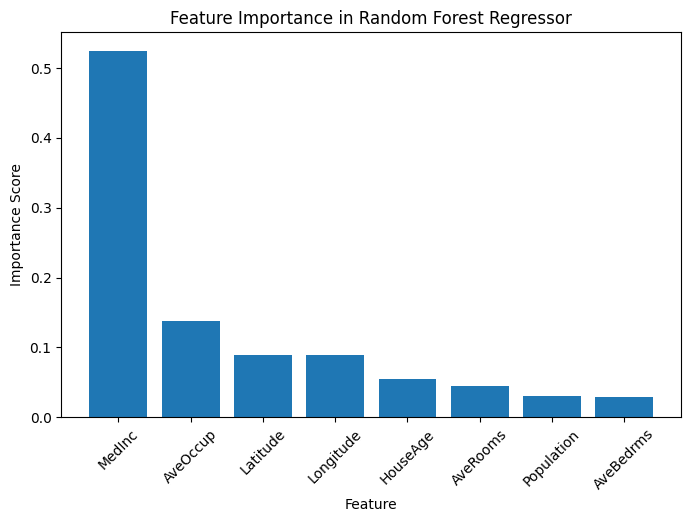


Mean Squared Error: 0.2554


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict and calculate Mean Squared Error
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Get feature importance scores
importances = rf_regressor.feature_importances_
sorted_idx = np.argsort(importances)[::-1]  # Sort in descending order

# Print feature importance scores
print("Feature Importance Scores:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.bar(range(len(importances)), importances[sorted_idx], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest Regressor")
plt.show()

# Print Mean Squared Error
print(f"\nMean Squared Error: {mse:.4f}")

**30.Train an ensemble model using both Bagging and Random Forest and compare accuracy.**

In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Bagging Classifier with Decision Tree as base model
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
bagging_pred = bagging_clf.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Print accuracy scores for comparison
print(f"Bagging Classifier Accuracy: {bagging_acc:.4f}")
print(f"Random Forest Classifier Accuracy: {rf_acc:.4f}")

Bagging Classifier Accuracy: 0.9386
Random Forest Classifier Accuracy: 0.9561


**31.Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.**

In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20],          # Tree depth
    'min_samples_split': [2, 5, 10],      # Min samples to split
    'min_samples_leaf': [1, 2, 4]         # Min samples per leaf
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_rf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and accuracy
print(f"Best Parameters: {best_params}")
print(f"Best Model Accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Accuracy: 0.9561


**32.Train a Bagging Regressor with different numbers of base estimators and compare performance.**

Bagging Regressor with 10 estimators - MSE: 0.2824
Bagging Regressor with 50 estimators - MSE: 0.2573
Bagging Regressor with 100 estimators - MSE: 0.2559
Bagging Regressor with 200 estimators - MSE: 0.2541


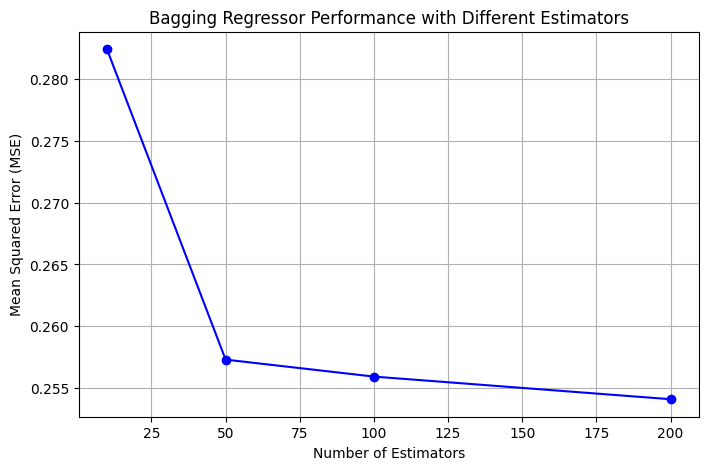

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of different numbers of base estimators
n_estimators_list = [10, 50, 100, 200]

# Store performance results
mse_scores = []

# Train and evaluate Bagging Regressor for different numbers of estimators
for n in n_estimators_list:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Bagging Regressor with {n} estimators - MSE: {mse:.4f}")

# Plot MSE scores
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, mse_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Bagging Regressor Performance with Different Estimators")
plt.grid()
plt.show()


**33.Train a Random Forest Classifier and analyze misclassified samples.**

Number of misclassified samples: 0


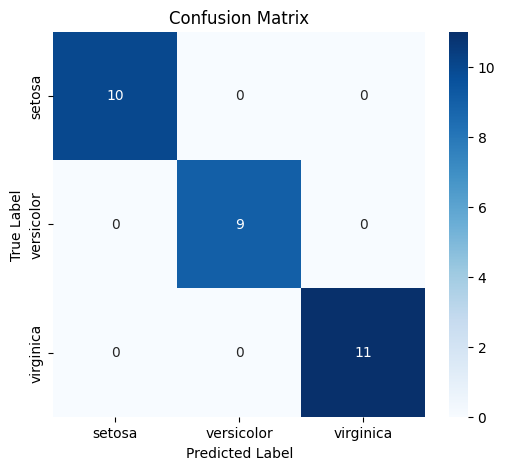

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target
class_names = data.target_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Identify misclassified samples
misclassified_indices = np.where(y_pred != y_test)[0]

# Print misclassified samples
print(f"Number of misclassified samples: {len(misclassified_indices)}")
for idx in misclassified_indices:
    print(f"Sample {idx}: True Label = {class_names[y_test[idx]]}, Predicted Label = {class_names[y_pred[idx]]}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

**34.Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier**

Decision Tree Accuracy: 0.9474
Bagging Classifier Accuracy: 0.9561


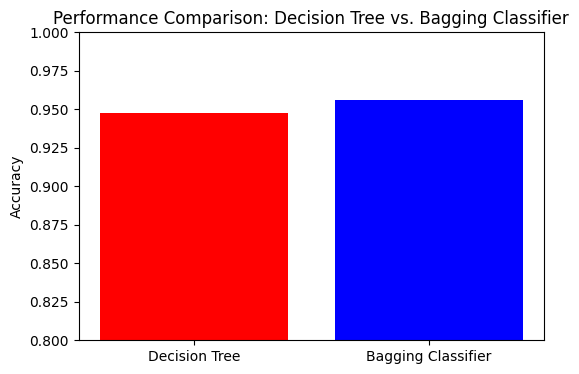

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Train a Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Print accuracy scores
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

# Bar chart to compare performance
plt.figure(figsize=(6, 4))
plt.bar(["Decision Tree", "Bagging Classifier"], [accuracy_dt, accuracy_bagging], color=["red", "blue"])
plt.ylabel("Accuracy")
plt.title("Performance Comparison: Decision Tree vs. Bagging Classifier")
plt.ylim(0.8, 1.0)
plt.show()

**35.Train a Random Forest Classifier and visualize the confusion matrix.**

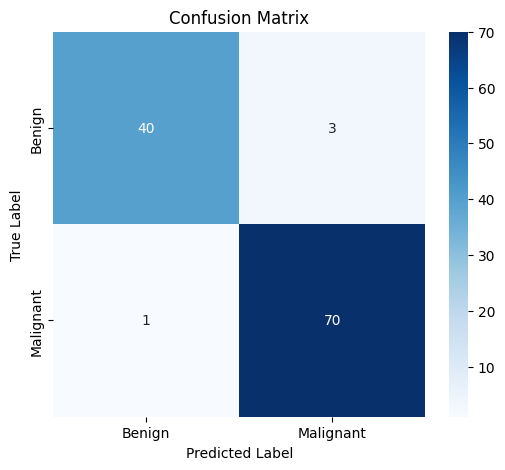

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.93      0.95        43
   Malignant       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))


**36.Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.**

Decision Tree Accuracy: 0.9474
SVM Accuracy: 0.9474
Logistic Regression Accuracy: 0.9561
Stacking Classifier Accuracy: 0.9737


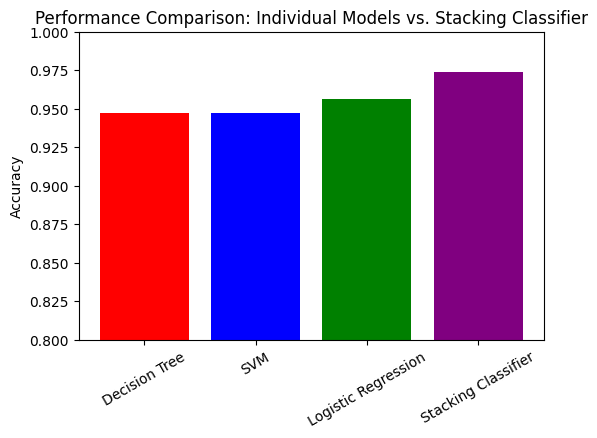

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
]

# Define meta-learner (final classifier)
meta_learner = RandomForestClassifier(n_estimators=50, random_state=42)

# Train Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=meta_learner)
stacking_clf.fit(X_train, y_train)

# Train individual models for comparison
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

models = {
    "Decision Tree": dt,
    "SVM": svm,
    "Logistic Regression": log_reg,
    "Stacking Classifier": stacking_clf
}

# Train models and evaluate accuracy
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Print accuracy scores
for model, acc in accuracy_scores.items():
    print(f"{model} Accuracy: {acc:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(6, 4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=["red", "blue", "green", "purple"])
plt.ylabel("Accuracy")
plt.title("Performance Comparison: Individual Models vs. Stacking Classifier")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=30)
plt.show()

**37.Train a Random Forest Classifier and print the top 5 most important features.**

Top 5 Most Important Features:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


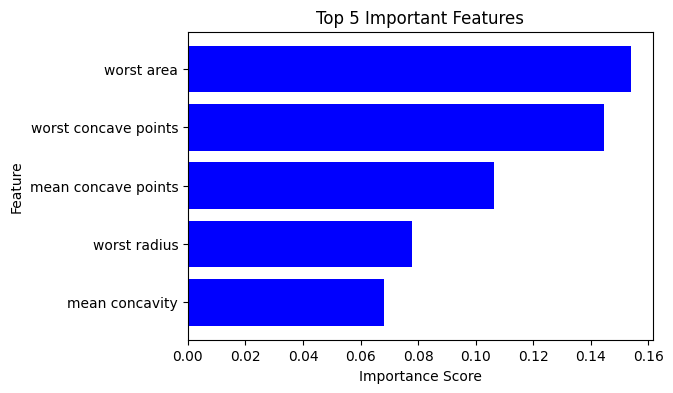

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
importances = rf.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 most important features
print("Top 5 Most Important Features:")
print(feature_importance_df.head())

# Plot feature importance
plt.figure(figsize=(6, 4))
plt.barh(feature_importance_df['Feature'][:5], feature_importance_df['Importance'][:5], color='blue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 5 Important Features")
plt.gca().invert_yaxis()
plt.show()

**38.Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.**

Precision: 0.9583
Recall: 0.9718
F1-score: 0.9650

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



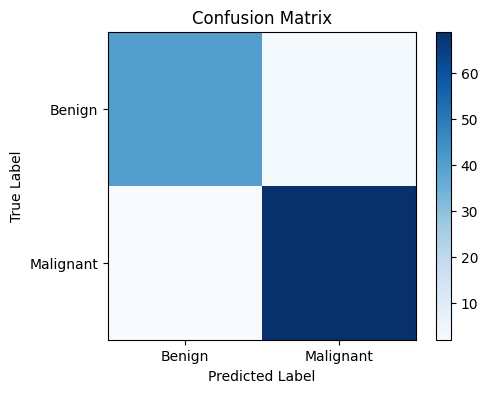

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier using Decision Tree as base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks([0, 1], ["Benign", "Malignant"])
plt.yticks([0, 1], ["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**39.Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.**

Max Depth: 1, Accuracy: 0.9561
Max Depth: 5, Accuracy: 0.9649
Max Depth: 10, Accuracy: 0.9649
Max Depth: 15, Accuracy: 0.9649
Max Depth: 20, Accuracy: 0.9649
Max Depth: None, Accuracy: 0.9649


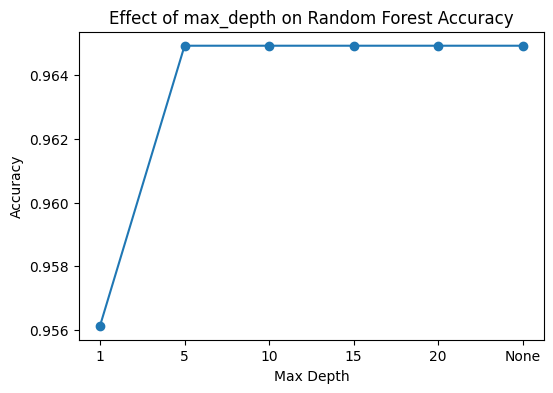

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of max_depth values to test
max_depth_values = [1, 5, 10, 15, 20, None]
accuracy_scores = []

# Train and evaluate models with different max_depth values
for max_depth in max_depth_values:
    rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")

# Plot the results
plt.figure(figsize=(6, 4))
plt.plot([str(md) for md in max_depth_values], accuracy_scores, marker='o', linestyle='-')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.show()


**40.Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.**

Mean Squared Error (Decision Tree as Base Estimator): 892.9605
Mean Squared Error (KNeighbors as Base Estimator): 1241.9006


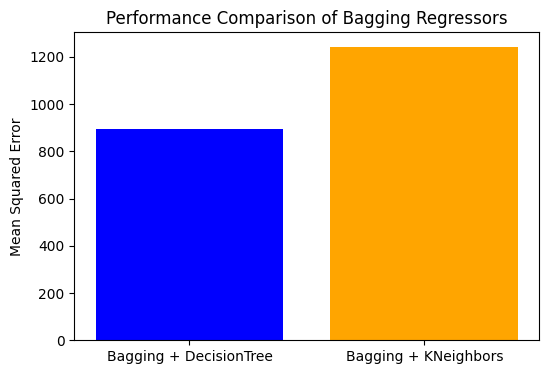

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Regressor with Decision Tree
bagging_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Train Bagging Regressor with KNeighbors Regressor
bagging_knn = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=50, random_state=42)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Print performance comparison
print(f"Mean Squared Error (Decision Tree as Base Estimator): {mse_dt:.4f}")
print(f"Mean Squared Error (KNeighbors as Base Estimator): {mse_knn:.4f}")

# Plot MSE comparison
models = ["Bagging + DecisionTree", "Bagging + KNeighbors"]
mse_values = [mse_dt, mse_knn]

plt.figure(figsize=(6, 4))
plt.bar(models, mse_values, color=["blue", "orange"])
plt.ylabel("Mean Squared Error")
plt.title("Performance Comparison of Bagging Regressors")
plt.show()

**41.Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.**

ROC-AUC Score: 0.9953


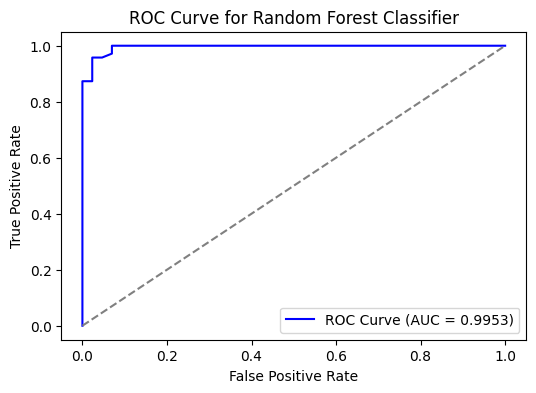

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# Compute the ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend()
plt.show()


**42.Train a Bagging Classifier and evaluate its performance using cross-validation**

In [30]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Bagging Classifier with Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Perform 5-fold cross-validation and compute accuracy
cv_scores = cross_val_score(bagging_clf, X_train, y_train, cv=5, scoring="accuracy")

# Print cross-validation accuracy scores
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Accuracy Scores: [0.93406593 0.91208791 0.96703297 0.95604396 0.94505495]
Mean Accuracy: 0.9429
Standard Deviation: 0.0189


**43.Train a Random Forest Classifier and plot the Precision-Recall curve.**

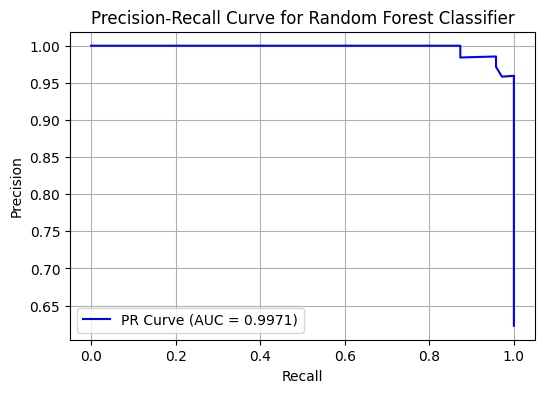

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# Compute Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Compute the area under the Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot the Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.4f})", color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest Classifier")
plt.legend()
plt.grid()
plt.show()

**44.Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.**

In [32]:
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define the final meta-model (Logistic Regression)
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Compute accuracy
stacking_accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.4f}")

# Train and evaluate Random Forest separately
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Stacking Classifier Accuracy: 0.9649
Random Forest Accuracy: 0.9649


**45.Train a Bagging Regressor with different levels of bootstrap samples and compare performance.**

Bootstrap Sample 0.5: MSE = 842.7326
Bootstrap Sample 0.7: MSE = 789.9397
Bootstrap Sample 1.0: MSE = 892.9605


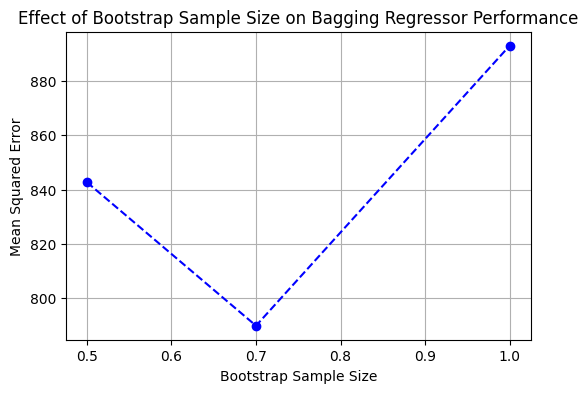

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a regression dataset
X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different bootstrap sample sizes
bootstrap_samples = [0.5, 0.7, 1.0]  # Proportion of samples used in each base estimator

# Dictionary to store MSE results
mse_results = {}

# Train and evaluate Bagging Regressor with different bootstrap sample sizes
for bootstrap in bootstrap_samples:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(),  # Use 'estimator' instead of 'base_estimator'
        n_estimators=50,
        max_samples=bootstrap,  # Control bootstrap sample size
        random_state=42
    )

    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results[bootstrap] = mse
    print(f"Bootstrap Sample {bootstrap:.1f}: MSE = {mse:.4f}")

# Plot the MSE results
plt.figure(figsize=(6, 4))
plt.plot(bootstrap_samples, list(mse_results.values()), marker='o', linestyle='--', color='b')
plt.xlabel("Bootstrap Sample Size")
plt.ylabel("Mean Squared Error")
plt.title("Effect of Bootstrap Sample Size on Bagging Regressor Performance")
plt.grid()
plt.show()
